In [1]:
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rc('font', size=13)

# matplotlib.rc('font', family='serif', size=9)
# matplotlib.rc('text.latex', preamble=['\\usepackage{times,mathptmx}'])
# matplotlib.rc('text', usetex=True)
# matplotlib.rc('legend', fontsize=8)
# matplotlib.rc('figure', figsize=(3.33,2))
# matplotlib.rc('axes', linewidth=0.5)
# matplotlib.rc('lines', linewidth=0.5)

df = pd.read_csv("completeness.csv")

for i in ["b1_w1", "b1_w2", "b2_w1", "b2_w2", "mach_w1", "mach_w2"]:
    df[i] = df[i] * 100
df

,rate,b1_w1,b1_w2,b2_w1,b2_w2,mach_w1,mach_w2
0,0.1,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,0.2,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2,0.3,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
3,0.4,95.430798,95.462573,100.000000,100.000000,100.000000,100.000000
4,0.5,97.099079,98.502317,100.000000,100.000000,100.000000,100.000000
5,0.6,99.353653,99.838004,100.000000,100.000000,100.000000,100.000000
6,0.7,91.768574,91.827993,100.000000,100.000000,100.000000,100.000000
7,0.8,87.606855,86.872355,100.000000,100.000000,100.000000,100.000000
8,0.9,84.858997,80.923582,100.000000,100.000000,100.000000,100.000000
9,1.0,79.033721,80.372612,100.000000,100.000000,100.000000,100.000000


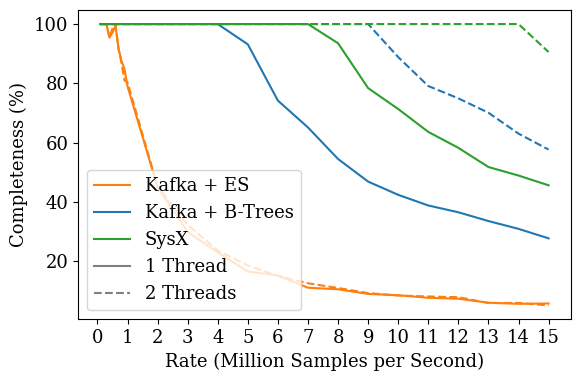

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(6, 4))

ax = plt.axes()
ax.plot(df["rate"], df["b1_w1"], color=colors[1], label="Kafka + ES")
ax.plot(df["rate"], df["b1_w2"], color=colors[1], linestyle='dashed')

ax.plot(df["rate"], df["b2_w1"], color=colors[0], label="Kafka + B-Trees")
ax.plot(df["rate"], df["b2_w2"], color=colors[0], linestyle='dashed')

ax.plot(df["rate"], df["mach_w1"], color=colors[2], label="SysX")
ax.plot(df["rate"], df["mach_w2"], color=colors[2], linestyle='dashed')

ax.set_xlabel("Rate (Million Samples per Second)")
ax.set_ylabel("Completeness (%)")

xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
ax.set_xticks(xticks, xticks)

#ax.xaxis.set_tick_params(which='minor', bottom=False)

handles, labels = ax.get_legend_handles_labels()
labels.append('1 Thread')
labels.append('2 Threads')

dashed_line = mlines.Line2D([], [], color='grey', linestyle="dashed")
solid_line = mlines.Line2D([], [], color='grey')
handles.append(solid_line)
handles.append(dashed_line)

ax.legend(handles, labels, loc="lower left")
plt.tight_layout()
plt.savefig('evaluation-completeness.pdf', format="pdf")
plt.show()

In [10]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]